# Geospatial analysis for vector data

**Objective:** To learn about how to read, write and visualize the raster data using python language.

Table of content

###### 1. Installation and importing geopandas
###### 2. Read Shapefiles
###### 3. Visualization of shapefile
###### 4. Write shapefile
###### 5. Working with attribute table
###### 6. Working with geometries (Vector operations)

For this course, we are going to use the [geopandas](https://geopandas.org/). GeoPandas is the open-source python package for reading, writing and analyzing the vector dataset. It extends the datatypes used by [pandas](https://pandas.pydata.org/) to allow spatial operations on geometric types. It further depends on [fiona](https://pypi.org/project/Fiona/) for file access and [matplotlib](https://matplotlib.org/) for visualization of data. 

**GeoPandas documentation:** https://geopandas.org/docs.html

**GeoPandas github:** https://github.com/geopandas/geopandas

**GeoPandas PyPI:** https://pypi.org/project/geopandas/

# 1. Installation and importing geopandas

The geopandas can be installed easily using conda command. Since it has several dependencies written in c ([GEOS](https://geos.readthedocs.io/en/latest/), [GDAL](https://gdal.org/), [PROJ](https://proj.org/)), sometime it is difficult to install it properly in windows. If you want to install it through `pip`, please check the [installation documentation of geopandas](https://geopandas.org/getting_started/install.html). But anyway you can install the geopandas using following command,

In [1]:
#!conda install -c conda-forge geopandas

If the installation is successful, you can import it as below,

In [2]:
import os

# import matplotlib
import matplotlib.pyplot as plt

# import geopandas
import geopandas as gpd

# check the version of geopandas
print("GeoPandas verison: {}".format(gpd.__version__))

GeoPandas verison: 0.9.0


In [3]:
# Set the working directory
os.chdir(r'C:/Users/tek/Desktop/python training/')

# 1. Read Shapefiles

The GeoPandas makes it easy to read and write the vector data in the pandas dataframe structure. We can easily read the vector data using `read_file` function.

![raster dataframe](../image/dataframe.svg)

In [4]:
# path to the shapefile
in_shp = r"data/shp/province_afg.shp"

# open and read the shp
gdf = gpd.read_file(in_shp)

In [5]:
# use head command to see the structure of shapefile
gdf.head()

,FID_Provin,OBJECTID,Prov_Name,Prov_ID,Shape_Leng,Shape_Area,Region,OBJECTID_1,Zone_,geometry
0,0,1,Badakhshan,15,20.994179,4.399067,Northeastern,3,Northeastern,"POLYGON ((71.19484 36.03904, 71.19482 36.03901..."
1,1,2,Badghis,29,8.377645,2.038167,Western,8,Western,"POLYGON ((64.70211 35.20804, 64.71847 35.19853..."
2,2,3,Baghlan,9,7.786293,1.776595,Northeastern,3,Northeastern,"POLYGON ((69.23461 36.32468, 69.22877 36.31975..."
3,3,4,Balkh,18,8.394132,1.690500,Northwestern,4,Northwestern,"POLYGON ((68.02602 36.92533, 68.02669 36.92473..."
4,4,5,Bamyan,10,8.587412,1.762777,West-Central,7,West-Central,"POLYGON ((68.10151 35.46796, 68.09969 35.46729..."


## 1.1 Read some additional informations

Lets try to get the more information of the shpefile in this section. 

In [6]:
# How many provience are there?
num_of_provience = len(gdf)
print("Nuber of provience: ", num_of_provience)
print("----------------------------------------------------------------------------------------------------")

# What is the coordinate system of the data?
crs = gdf.crs
print("Projection of data: ", crs)
print("----------------------------------------------------------------------------------------------------")

# what is the geometry type of data?
geom_type = set(gdf.geom_type)
print("Geometry of data: ", geom_type)
print("----------------------------------------------------------------------------------------------------")

Nuber of provience:  34
----------------------------------------------------------------------------------------------------
Projection of data:  epsg:4326
----------------------------------------------------------------------------------------------------
Geometry of data:  {'Polygon'}
----------------------------------------------------------------------------------------------------


# Visualization of shapeifle

The geopandas use `plot` function, which is imported from [matplotlib pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) library, which helps us to visualize the data in nice format. If the column name is specified, the plot coloring will be based on the values in that column. 

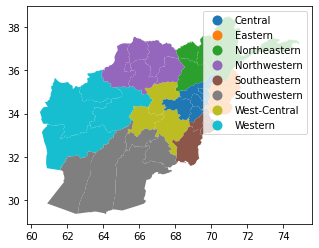

In [7]:
plot = gdf.plot("Region", legend=True)

Now lets try to visualize the map using matplotlib library. In below code, the we tried to set the legend position. The `loc` argument on `legend_kwds` denotes the initial position of the legend. After that we set the position again using `leg.set_bbox_to_anchor` function. The available values for `loc` are,  

* Location String	Location Code
* 'best'	        0
* 'upper right'	    1
* 'upper left'	    2
* 'lower left'	    3
* 'lower right'	    4
* 'right'          	5
* 'center left'	    6
* 'center right'	7
* 'lower center'	8
* 'upper center'	9
* 'center'	        10

In the `set_bbox_to_anchor`, you have to pass the values in this order, `(x0,y0, width, height)` default value is `(0,0,1,1)`. `x0`, `y0` varies from 0 to 1. You can pass only two elements as well here. If you pass only two elements, the width and height will be automatically assigned to 1.

**Bonus:** you can pass the `cmap` parameter on `plot` function to assign your own color. The available values for `cmap` are available [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

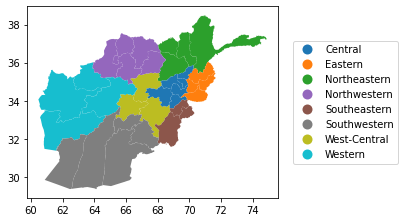

In [8]:
fig, ax = plt.subplots(1, figsize=(4.5,10))
gdf.plot(ax=ax, column='Region', legend=True, legend_kwds={"loc": "center left"})
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.04, 0.5))

# Write shapefile

For writing the shapefile, there is the `to_file` method available on the dataframe object. You just need to pass the output file name like below code,

In [9]:
gdf.to_file('data/output/vector/province_out.shp')

If you want to output the file in different file format, then check the below code for [`geojson`](https://geojson.org/) and [`geopackage`](https://www.geopackage.org/) file format.

In [10]:
# geojson output
gdf.to_file("data/output/vector/province.geojson", driver='GeoJSON',encoding='utf-8')

# geopackage output
gdf.to_file("data/output/vector/province.gpkg", layer="province", driver='GPKG',encoding='utf-8')

*Exercise 1: Read, write and visualize the the data from `data/shp` directory named as `zones.shp`.*

*Exercise 2: Visualize the `province_out.shp` file based on `Shape_Area` column.*

# Working with attribute table 

By using `geopandas`, we can filter, edit and save the data as a new file. In this section we are going to explore it. First of all, lets try to get the structure of the data,

In [11]:
gdf.head()

,FID_Provin,OBJECTID,Prov_Name,Prov_ID,Shape_Leng,Shape_Area,Region,OBJECTID_1,Zone_,geometry
0,0,1,Badakhshan,15,20.994179,4.399067,Northeastern,3,Northeastern,"POLYGON ((71.19484 36.03904, 71.19482 36.03901..."
1,1,2,Badghis,29,8.377645,2.038167,Western,8,Western,"POLYGON ((64.70211 35.20804, 64.71847 35.19853..."
2,2,3,Baghlan,9,7.786293,1.776595,Northeastern,3,Northeastern,"POLYGON ((69.23461 36.32468, 69.22877 36.31975..."
3,3,4,Balkh,18,8.394132,1.690500,Northwestern,4,Northwestern,"POLYGON ((68.02602 36.92533, 68.02669 36.92473..."
4,4,5,Bamyan,10,8.587412,1.762777,West-Central,7,West-Central,"POLYGON ((68.10151 35.46796, 68.09969 35.46729..."


Now lets try to filter the data by Region="Western" as below

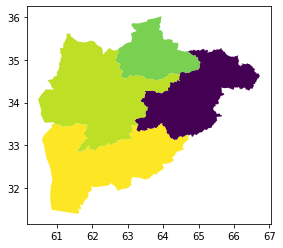

In [12]:
west_region = gdf[gdf['Region'] == 'Western']
west_region.plot('Prov_ID')

Lets visualize the two plots, one for west region and another for whole Afghanistan and check whether boundaries are correct or not. For this lets create the matplotlib axis as below,x

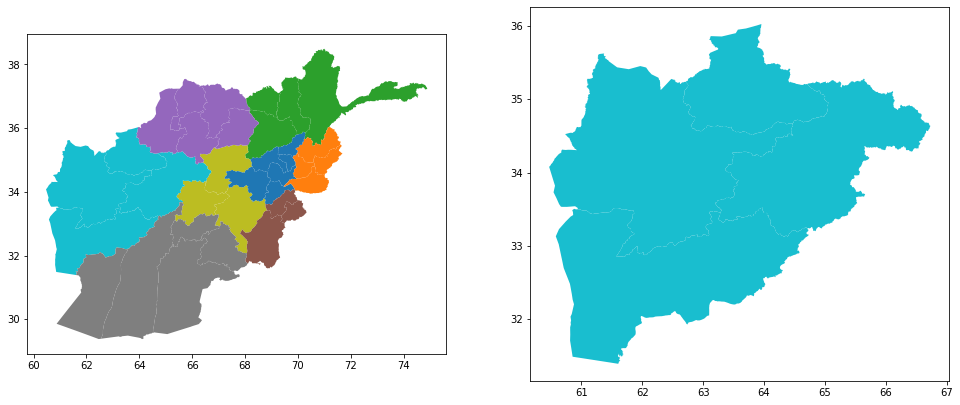

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53,11.69)) # print map on A3 paper size
gdf.plot(ax=ax1, column="Region", )
west_region.plot(ax=ax2, color="#19BECF")

Above maps boundrary looks ok. Now lets try something different. First of all lets calculate the area of the each province and then filter out the provience which area are greater than 20,000 sq.km.

In [14]:
# try to copy the original dataframe so that all changes will stored on copied dataframe
gdf_copy = gdf.copy

# The data is avilable on geograpic coordinate system, so change the coordinate system to projected coordinate
gdf_copy = gdf.to_crs(epsg=32642)

# Calculate the area using geometry.area and divide it by 10^6 (1000*1000)
gdf_copy["area"] = gdf_copy.geometry.area / 10**6

# check the new dataframe with area column
gdf_copy.head()

,FID_Provin,OBJECTID,Prov_Name,Prov_ID,Shape_Leng,Shape_Area,Region,OBJECTID_1,Zone_,geometry,area
0,0,1,Badakhshan,15,20.994179,4.399067,Northeastern,3,Northeastern,"POLYGON ((697732.928 3990507.421, 697731.241 3...",43460.082502
1,1,2,Badghis,29,8.377645,2.038167,Western,8,Western,"POLYGON ((108681.870 3904585.868, 110126.664 3...",20709.235840
2,2,3,Baghlan,9,7.786293,1.776595,Northeastern,3,Northeastern,"POLYGON ((521057.468 4019986.299, 520534.810 4...",17803.307648
3,3,4,Balkh,18,8.394132,1.690500,Northwestern,4,Northwestern,"POLYGON ((413253.179 4087032.032, 413312.349 4...",16769.211164
4,4,5,Bamyan,10,8.587412,1.762777,West-Central,7,West-Central,"POLYGON ((418479.485 3925311.355, 418313.812 3...",17892.113095


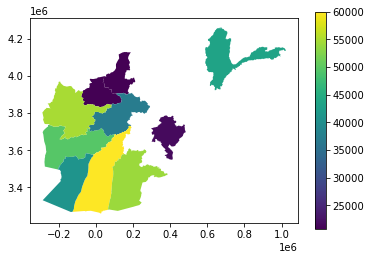

In [15]:
prov_area = gdf_copy[gdf_copy['area'] > 20000]
prov_area.plot(column='area', legend=True)

*Exercise 1: Filter the geodataframe `gdf` with condition, 1. Prov_Name start from `B` having area between 20,000 sq.km - 50,000 sq.km.*

*Exercise 2: Visualize the result from exercise 1.*

*Exercise 3: Save the result from exercise 1 as shapefile and name it as `filtered_data.shp`.*

*Exercise 4: Filter the geodataframe `gdf` based on `Prov_Name` column whose value is Balkh and save the output shapefile named as `balkh.shp`.* 

**Note: We are going to use `balkh.shp` file in tomorrow exercise.**

<br /> <br />

# Working with geometries (Vector operations)

In this section, we are going to work with the geometric operations. 

In [16]:
gdf_filter = gdf_copy[['Region', 'geometry', 'area']]
region = gdf_filter.dissolve(by="Region", aggfunc="sum")
region.index

Index(['Central', 'Eastern', 'Northeastern', 'Northwestern', 'Southeastern',
       'Southwestern', 'West-Central', 'Western'],
      dtype='object', name='Region')

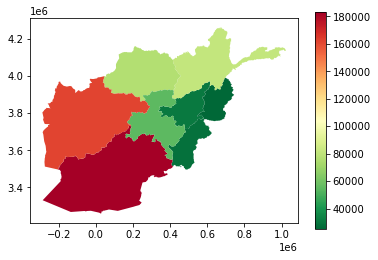

In [17]:
region.plot('area', cmap="RdYlGn_r", legend=True)

### Point, Line, Polygon

In this section, we are going to create and manipulate the geometries in Python using shapely. There are 8 different type of geometry type. For the clear understanding, please have a look to below image,

![SpatialDataModel.png](../image/SpatialDataModel.png)

The following code will create the simple geometry using shapely library. 

In [18]:
from shapely.geometry import Polygon, Point, LineString
p1 = Point(33.9391,67.7100)
p2 = Point(35,70)
p3 = LineString([p1, p2])
p4 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

Now we can create the geodataframe using above geometries. 

In [19]:
df_shapely = gpd.GeoSeries([p1, p2, p3, p4])
df_shapely = gpd.GeoDataFrame(df_shapely)
df_shapely.columns = ['geometry']
df_shapely.crs = "EPSG:4326"
df_shapely.head()

,geometry
0,POINT (33.93910 67.71000)
1,POINT (35.00000 70.00000)
2,"LINESTRING (33.93910 67.71000, 35.00000 70.00000)"
3,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3...."


In [20]:
df_shapely.to_file("./data/output/shapely.geojson", driver='GeoJSON')

*Exercise: Create the polygon using 5 random point geometry and export it as a shapefile.*

## Case study (population data)

In this section, we will load the population data from csv file using [pandas library](https://pandas.pydata.org/). The csv file contain the population data based on the province. Now lets merge this data to the our geodataframe.

**The population data is downloaded from [world bank data catalogue](https://www.worldbank.org/en/data/interactive/2019/08/01/afghanistan-interactive-province-level-visualization)**

In [21]:
# import required library
import pandas as pd
import numpy as np

# dataframe for population data
df_population = pd.read_csv('data/excel/population_prov.csv')

In [22]:
df_population.head()

,Prov_ID,Province,Population,Population Density
0,1,Badakhshan,966789,22.2
1,2,Badghes,504185,24.3
2,3,Baghlan,926969,52.1
3,4,Balkh,1353626,80.7
4,5,Bamyan,454633,25.4


In [23]:
gdf.head()

,FID_Provin,OBJECTID,Prov_Name,Prov_ID,Shape_Leng,Shape_Area,Region,OBJECTID_1,Zone_,geometry
0,0,1,Badakhshan,15,20.994179,4.399067,Northeastern,3,Northeastern,"POLYGON ((71.19484 36.03904, 71.19482 36.03901..."
1,1,2,Badghis,29,8.377645,2.038167,Western,8,Western,"POLYGON ((64.70211 35.20804, 64.71847 35.19853..."
2,2,3,Baghlan,9,7.786293,1.776595,Northeastern,3,Northeastern,"POLYGON ((69.23461 36.32468, 69.22877 36.31975..."
3,3,4,Balkh,18,8.394132,1.690500,Northwestern,4,Northwestern,"POLYGON ((68.02602 36.92533, 68.02669 36.92473..."
4,4,5,Bamyan,10,8.587412,1.762777,West-Central,7,West-Central,"POLYGON ((68.10151 35.46796, 68.09969 35.46729..."


From above dataframes, we can see that the Both dataframe have `Prov_Name` is the common field. We are going to use the `Prov_Name` column and join the results. In following code,

* `how`: Type of merge to be performed. available methods are,  `left`, `right`, `outer`, `inner`, `cross`
* `on`: Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

Read more about merge operation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [24]:
gdf_merge = gdf.merge(df_population, how="left", left_on="Prov_Name", right_on="Province")

In [25]:
gdf_merge.sort_values('Prov_Name')

,FID_Provin,OBJECTID,Prov_Name,Prov_ID_x,Shape_Leng,Shape_Area,Region,OBJECTID_1,Zone_,geometry,Prov_ID_y,Province,Population,Population Density
0,0,1,Badakhshan,15,20.994179,4.399067,Northeastern,3,Northeastern,"POLYGON ((71.19484 36.03904, 71.19482 36.03901...",1.0,Badakhshan,966789.0,22.2
1,1,2,Badghis,29,8.377645,2.038167,Western,8,Western,"POLYGON ((64.70211 35.20804, 64.71847 35.19853...",NaN,NaN,NaN,NaN
2,2,3,Baghlan,9,7.786293,1.776595,Northeastern,3,Northeastern,"POLYGON ((69.23461 36.32468, 69.22877 36.31975...",3.0,Baghlan,926969.0,52.1
3,3,4,Balkh,18,8.394132,1.690500,Northwestern,4,Northwestern,"POLYGON ((68.02602 36.92533, 68.02669 36.92473...",4.0,Balkh,1353626.0,80.7
4,4,5,Bamyan,10,8.587412,1.762777,West-Central,7,West-Central,"POLYGON ((68.10151 35.46796, 68.09969 35.46729...",5.0,Bamyan,454633.0,25.4
5,5,6,Daykundi,22,8.685684,1.533231,West-Central,7,West-Central,"POLYGON ((66.53354 34.32981, 66.53817 34.32544...",6.0,Daykundi,468178.0,28.1
6,6,7,Farah,31,15.353344,4.720559,Western,8,Western,"POLYGON ((64.70881 33.23228, 64.70967 33.23146...",7.0,Farah,515973.0,10.4
7,7,8,Faryab,28,9.148955,2.067086,Northwestern,4,Northwestern,"POLYGON ((65.48327 37.23736, 65.47914 37.23016...",8.0,Faryab,1015335.0,49.0
8,8,9,Ghazni,11,10.285901,2.099038,West-Central,7,West-Central,"POLYGON ((68.71256 33.79230, 68.71303 33.79189...",9.0,Ghazni,1249376.0,57.4
9,9,10,Ghor,21,14.217544,3.620942,Western,8,Western,"POLYGON ((66.42290 34.91270, 66.44060 34.89914...",10.0,Ghor,701653.0,18.9


From above dataframe, we see there are some null values. These values are generated due to mis-match on the `Prov_Name` column on two dataframes. To correct the name either you need to edit the `population_prov.csv` file manually to match it with our shapefile or you can do it through `code` as well. For this lets filter our `gdf_merge` which has `NaN` population value.

In [26]:
null_val = gdf_merge[gdf_merge['Population'].isnull()]
null_val['Prov_Name']

1      Badghis
10     Hilmand
11       Hirat
17       Kunar
23    Nuristan
Name: Prov_Name, dtype: object

Now you got the null value `Prov_Name` which values are null. You can go to the `population_prov.csv` file and update the file with correct name and re-run the cell from merge section.

*Exercise 1: Make the choropleth map using population data.*

*Exercise 2: Filter the region of your interest and visualize it.*

*Exercise 3: Explore more about geometric operations such as Intersation, union, buffer etc operations using geopandas. ([Help](https://geopandas.org/docs/user_guide/geometric_manipulations.html))*



# Thank You